In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import astropy.units as u
import astropy.constants as c
plt.style.use('az-paper-twocol')

In [2]:
stellar_hosts = pd.read_csv('../data/STELLARHOSTS.csv', skiprows=20)

In [3]:
# if there is no mass or log g, remove the row
stellar_hosts = stellar_hosts[stellar_hosts['st_logg'].notna() | (stellar_hosts['st_mass'].notna() & stellar_hosts['st_rad'].notna())]

# Only beteen 3000 and 7000 K
stellar_hosts = stellar_hosts[(stellar_hosts['st_teff'] > 3000) & (stellar_hosts['st_teff'] < 7000)]

# if there is no log g, calculate it from the mass and radius
stellar_hosts['st_logg'] = stellar_hosts['st_logg'].fillna(np.log10(((stellar_hosts['st_mass'] * c.M_sun.cgs * c.G.cgs) / (stellar_hosts['st_rad'] * c.R_sun.cgs)**2)))

(3000.0, 7000.0)

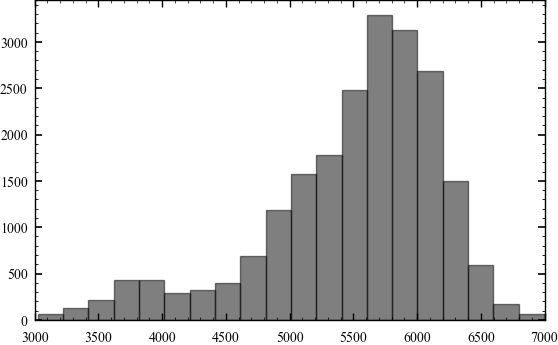

In [21]:
plt.hist(stellar_hosts['st_teff'], bins=20, color='C0', alpha=0.5, edgecolor='black')
plt.xlim(3000, 7000)

(2.0, 6.0)

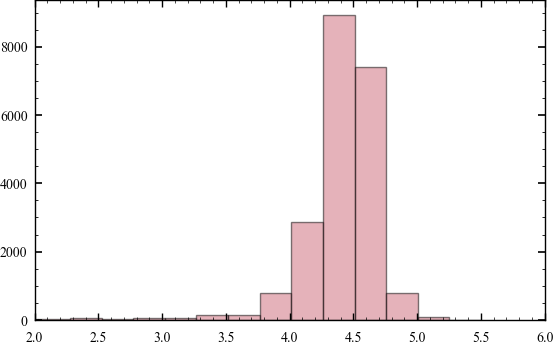

In [5]:
plt.hist(stellar_hosts['st_logg'], bins=20, color='C1', alpha=0.5, edgecolor='black')
plt.xlim(2,6)

(-2.0, 2.0)

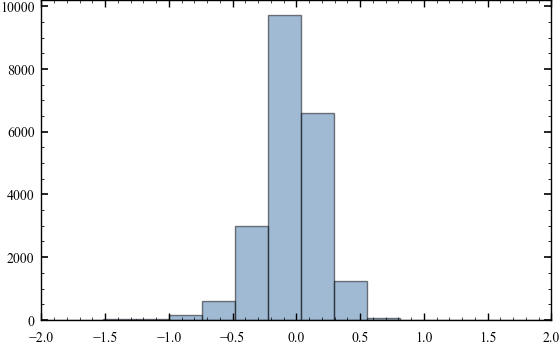

In [6]:
plt.hist(stellar_hosts['st_met'], bins=40, color='C2', alpha=0.5, edgecolor='black')
plt.xlim(-2,2)

(0.1, 2.5)

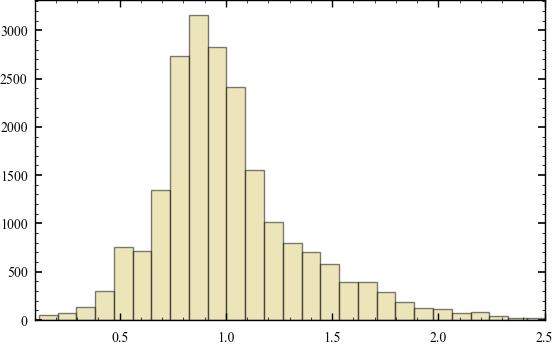

In [27]:
plt.hist(stellar_hosts['st_rad'], bins=1000, color='C3', alpha=0.5, edgecolor='black')
plt.xlim(0.1,2.5)

To sample stars, do a uniform distribution across temperature range of interest then match that to closest star. Should in theory recreate the distribution we want.

In [20]:
# Sample uniform distribution of temperature, then match that to the nearest temperature in the stellar hosts and pull the log g and metallicity
# Sample 10000 temperatures
n_samples = 10000
grided_teff = np.random.uniform(3000, 7000, n_samples)
sampled_teff = np.zeros(n_samples)
sampled_logg = np.zeros(n_samples)
sampled_met = np.zeros(n_samples)
sampled_R = np.zeros(n_samples)

for i in range(n_samples):
    # find the index of the closest temperature in the stellar hosts
    idx = (np.abs(stellar_hosts['st_teff'] - grided_teff[i])).idxmin()
    sampled_teff[i] = stellar_hosts['st_teff'][idx]
    sampled_logg[i] = stellar_hosts['st_logg'][idx]
    sampled_met[i] = stellar_hosts['st_met'][idx]
    sampled_R[i] = stellar_hosts['st_rad'][idx]

stars = zip(sampled_teff, sampled_logg, sampled_met)

(3000.0, 7000.0)

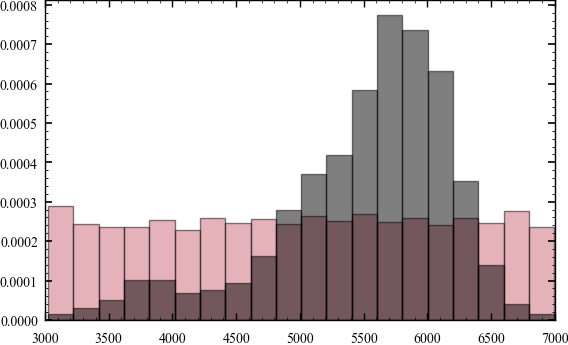

In [15]:
plt.hist(sampled_teff, bins=20, color='C1', alpha=0.5, edgecolor='black', density=True)
plt.hist(stellar_hosts['st_teff'], bins=20, color='C0', alpha=0.5, edgecolor='black', density=True)
plt.xlim(3000, 7000)